In [ ]:
!wget https://johnvansickle.com/ffmpeg/builds/ffmpeg-git-i686-static.tar.xz

In [1]:
!tar xvf ffmpeg-git-i686-static.tar.xz


ffmpeg-git-20200119-i686-static/
ffmpeg-git-20200119-i686-static/GPLv3.txt
ffmpeg-git-20200119-i686-static/manpages/
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-all.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-scaler.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-resampler.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-filters.txt
ffmpeg-git-20200119-i686-static/manpages/ffprobe.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-devices.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-utils.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-protocols.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-codecs.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-bitstream-filters.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg.txt
ffmpeg-git-20200119-i686-static/manpages/ffmpeg-formats.txt
ffmpeg-git-20200119-i686-static/ffprobe
ffmpeg-git-20200119-i686-static/qt-faststart
ffmpeg-git-20200119-i686-static/readme.txt
ffmpeg-git-20200119-i686-static/ffmpeg


In [2]:
!ffmpeg-git-20200119-i686-static/ffmpeg

ffmpeg version N-51450-gb5dba152ef-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 6.3.0 (Debian 6.3.0-18+deb9u1) 20170516
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc-6 --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libfribidi --enable-libass --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg
  libavutil      56. 38.100 / 56. 38.100
  libavcodec     58. 66.100 / 58. 66.100
  libavformat    58. 35.104 / 58. 35.104
  liba

In [3]:
!pip install ffmpeg-python

mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.2 which is incompatible.
kmeans-smote 0.1.0 has requirement imbalanced-learn<0.4,>=0.3.1, but you'll have imbalanced-learn 0.5.0.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement numpy<1.15,>=1.13, but you'll have numpy 1.15.2 which is incompatible.
fastai 0.7.0 has requirement torch<0.4, but you'll have torch 0.4.1 which is incompatible.
anaconda-client 1.7.2 has requirement python-dateutil>=2.6.1, but you'll have python-dateutil 2.6.0 which is incompatible.
imbalanced-learn 0.5.0.dev0 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import ffmpeg
import numpy as np
import pandas as pd
from ipywidgets import interact
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from IPython.display import Audio, display
import librosa
import librosa.display

from datetime import datetime

In [2]:
class ffmpegProcessor:
    def __init__(self):
        self.cmd = 'ffmpeg-git-20200119-i686-static/ffmpeg'
        
    def read_video_audio(self, filename):
        out, err = (
            ffmpeg
            .input(filename)
            .output('pipe:', format='rawvideo', pix_fmt='rgb24')
            .run(cmd=self.cmd, capture_stdout=True, capture_stderr=True)
        )
        
        video = (
            np
            .frombuffer(out, np.uint8)
            .reshape([-1, 1080,1920, 3])
            #.reshape([-1, 1920, 1080, 3])
        )

        out, err = (
            ffmpeg
            .input(filename)
            .output('-', format='f32le', acodec='pcm_f32le', ac=1, ar='48000')
            .run(cmd=self.cmd, capture_stdout=True, capture_stderr=True)
        )
        
        audio = (
            np
            .frombuffer(out, np.float32)
        )
        
        return video, audio
    
    def extract_audio(self, filename):
        out, _ = (
            ffmpeg
            .input(filename)
            .output('-', format='f32le', acodec='pcm_f32le', ac=1, ar='44100')
            .run(cmd=self.cmd, capture_stdout=True, capture_stderr=True)
        )
        
        return np.frombuffer(out, np.float32)

In [3]:
vp = ffmpegProcessor()

In [30]:
del vf, af, vr, ar


NameError: name 'vf' is not defined

In [4]:
vf, af = vp.read_video_audio('../videos/dfdc_train_part_48/jjioflapll.mp4')
vr, ar = vp.read_video_audio('../videos/dfdc_train_part_48/pwqcfklfqn.mp4')

In [5]:
len(vf), len(af), len(vr), len(ar), np.array_equal(vf, vr), np.array_equal(af, ar)

(300, 482304, 300, 480375, False, False)

In [6]:
@interact(frame=(0, len(vf)))
def show_frame(frame=0):
    plt.figure(figsize=(16,10))
    plt.imshow(vf[frame,:,:,:])

interactive(children=(IntSlider(value=0, description='frame', max=300), Output()), _dom_classes=('widget-inter…

In [9]:
@interact(frame=(0, len(vr)))
def show_frame(frame=0):
    plt.figure(figsize=(16,10))
    plt.imshow(vr[frame,:,:,:])

interactive(children=(IntSlider(value=0, description='frame', max=300), Output()), _dom_classes=('widget-inter…

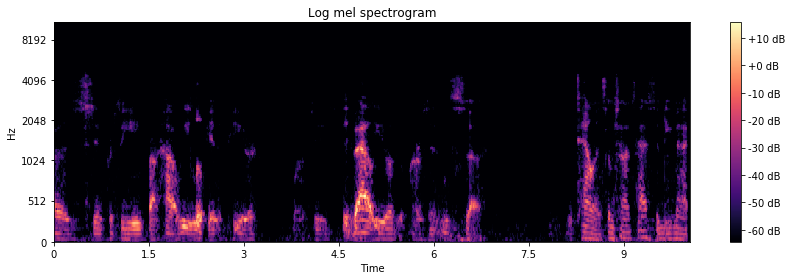

In [30]:
melspec = librosa.feature.melspectrogram(af, sr=44100, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=44100, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

display(Audio(data=af, rate=44100))


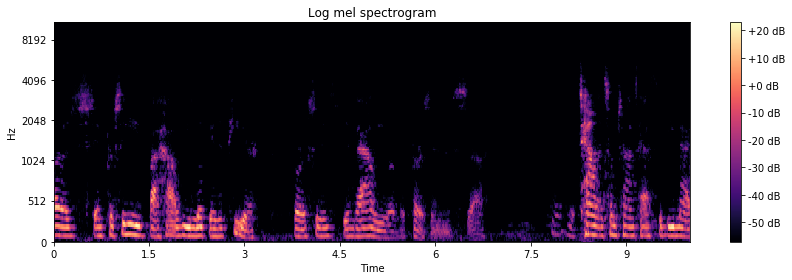

In [31]:
melspec = librosa.feature.melspectrogram(ar, sr=44100, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=44100, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

display(Audio(data=ar, rate=44100))
np.savez('../data/audio/test', log_S=log_S)

In [32]:
log_S.nbytes

882688

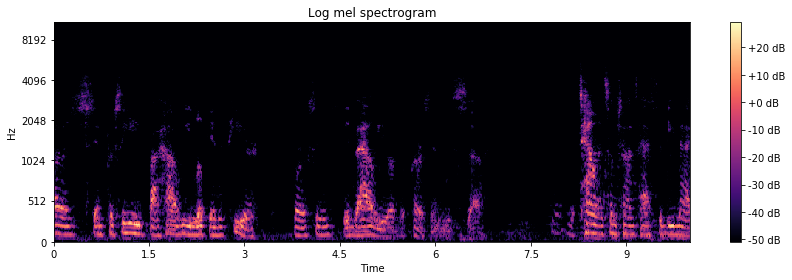

In [29]:
diff = af[:441236]-ar[:441236]
melspec = librosa.feature.melspectrogram(diff, sr=44100, n_mels=256)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=44100, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

display(Audio(data=diff, rate=44100))

In [22]:
df = pd.read_csv('../data/metadata_Xception.csv')
df.sample(10)

,video,label,original,split,dir,processed
9387,pwyouvrckw.mp4,FAKE,vqqibukdgb.mp4,train,dfdc_train_part_48,False
7744,fsnexexcka.mp4,FAKE,ddmwokwixc.mp4,train,dfdc_train_part_14,False
3988,husyyhazww.mp4,FAKE,kasgftjjmu.mp4,train,dfdc_train_part_20,False
1892,xplgpliaev.mp4,FAKE,cfmvycbhlt.mp4,train,dfdc_train_part_21,False
10650,zkwczgwxfw.mp4,FAKE,aumsysgpsf.mp4,train,dfdc_train_part_48,False
11928,mqbktovcxh.mp4,FAKE,ssuxrxhshr.mp4,train,dfdc_train_part_3,False
8607,fdezrogbya.mp4,FAKE,iaaecuquha.mp4,train,dfdc_train_part_48,False
2833,jpggwgjgtz.mp4,FAKE,wbctcqwbtc.mp4,train,dfdc_train_part_20,False
12749,bcxgxzusit.mp4,FAKE,auoervelwm.mp4,train,dfdc_train_part_2,False
6301,khdpbidakx.mp4,FAKE,bfdieyuhkl.mp4,train,dfdc_train_part_14,False


In [307]:
for index, row in df.query('label == "FAKE" and dir != "dfdc_train_part_1"').sample(50).iterrows():
    ti = datetime.now()
    
    af = vp.extract_audio(f"../videos/{row.dir}/{row.video}")
    ar = vp.extract_audio(f"../videos/{row.dir}/{row.original}")

    if not np.array_equal(af, ar):
        print(f'{row.dir}/{row.video} != {row.original}')
        lf = len(af)
        lr = len(ar)
        l = lf if lf < lr else lr

        if np.max(af[:l]-ar[:l]) > 0.08:
            print('Si')

    print("Delta = ", datetime.now() - ti)


Delta =  0:00:00.421494
Delta =  0:00:00.451082
Delta =  0:00:00.602335
Delta =  0:00:00.466983
Delta =  0:00:00.493411
Delta =  0:00:00.443921
Delta =  0:00:00.409712
Delta =  0:00:00.419827
Delta =  0:00:00.450340
Delta =  0:00:00.431074
Delta =  0:00:00.410221
Delta =  0:00:00.448736
Delta =  0:00:00.458549
Delta =  0:00:00.434571
Delta =  0:00:00.407159
Delta =  0:00:00.435400
dfdc_train_part_48/lltnqnduyw.mp4 != jrmqsinefn.mp4
Si
Delta =  0:00:00.418013
Delta =  0:00:00.592724
dfdc_train_part_48/ogxclikmst.mp4 != vdqritvjfl.mp4
Si
Delta =  0:00:00.413230
Delta =  0:00:00.427001
Delta =  0:00:00.402962
Delta =  0:00:00.410083
Delta =  0:00:00.412574
Delta =  0:00:00.523604
Delta =  0:00:00.497481
Delta =  0:00:00.594248
Delta =  0:00:00.476410
Delta =  0:00:00.404993
Delta =  0:00:00.467312
Delta =  0:00:00.449540
Delta =  0:00:00.463561
Delta =  0:00:00.475204
dfdc_train_part_3/cvqrchlzhm.mp4 != kytwyrusew.mp4
Delta =  0:00:00.494179
dfdc_train_part_48/nvarnevska.mp4 != yfhqhjbtdb

In [23]:
af = vp.extract_audio(f"../videos/dfdc_train_part_48/nvarnevska.mp4")
ar = vp.extract_audio(f"../videos/dfdc_train_part_48/yfhqhjbtdb.mp4")
print(len(af), len(ar))
np.max(af[:441236]-ar[:441236]) > 0.08

443117 441236


True

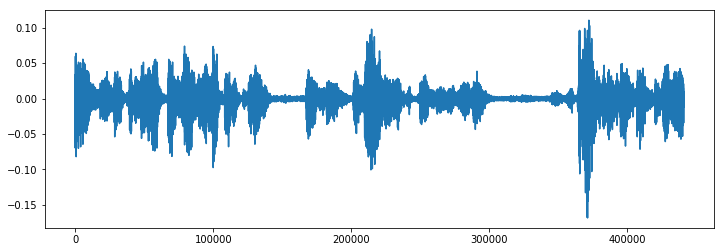

In [25]:
plt.figure(figsize=(12,4))
plt.plot(af[:441236]-ar[:441236])

## Conclusion


* use ffmpeg to extact audio migth be viable
  * time to extract around 0.5 seconds
  * sr = 44100
  * one channel (mono)

* max diff > 0.08
